# Case 1
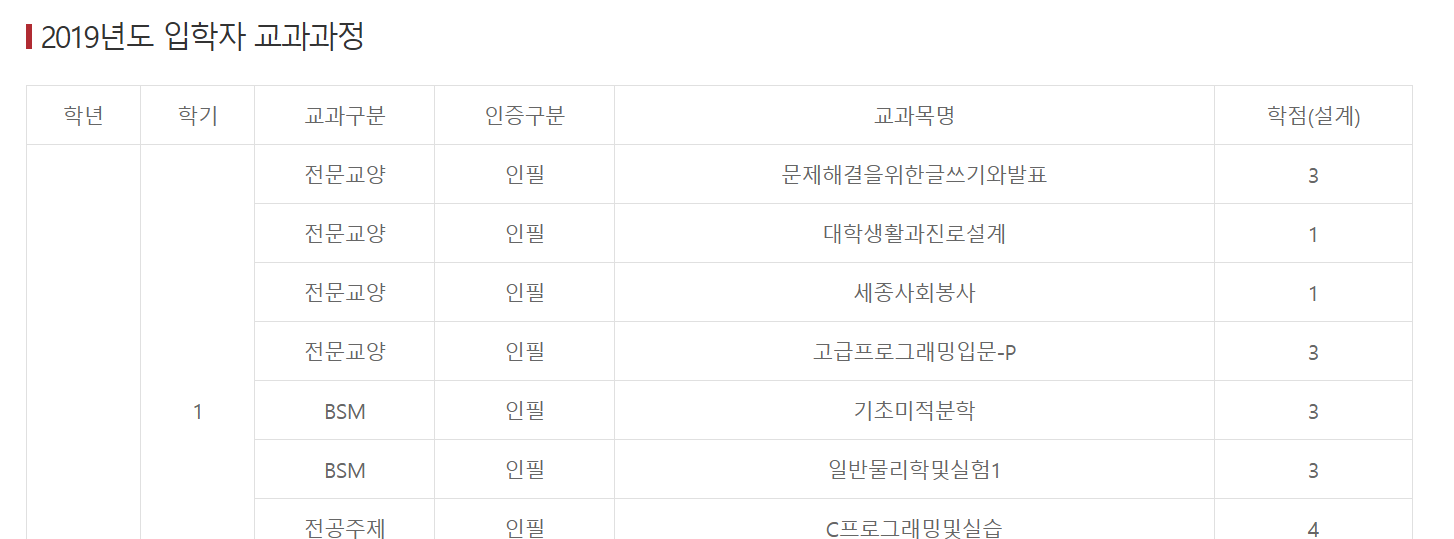

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd

# 브라우저를 헤드리스 모드로 설정
options = Options()
options.headless = True

# WebDriver 설정
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=options)

# 웹페이지 접근
driver.get("https://abeek.sejong.ac.kr/abeek/program0302_6.html")


# 데이터를 담을 리스트 초기화
data = []

# 테이블 찾기
try:
    # 테이블을 포함하는 div 요소를 찾기
    table_div = driver.find_element(By.XPATH, '//*[@id="contents"]/div[3]/div[2]')
    table = table_div.find_element(By.XPATH, './/table')

    # 테이블의 행들 추출
    rows = table.find_elements(By.XPATH, './/tr')
    for row in rows:
        cells = row.find_elements(By.XPATH, './/th|.//td')
        row_data = [cell.text.strip() for cell in cells]
        if "소계" not in row_data:  # "소계"가 포함된 행 제거
            data.append(row_data)

    # 첫 번째 행을 컬럼 헤더로 설정
    columns = data[0]
    data = data[1:]

    # 데이터를 DataFrame으로 변환
    df = pd.DataFrame(data, columns=columns)

    # 최대 컬럼 수 결정
    max_columns = max(len(row) for row in data)

    # 빈 셀을 채우기
    new_data = []
    for row in data:
        new_row = ["" for _ in range(max_columns - len(row))] + row
        new_data.append(new_row)

    # 새로운 데이터를 DataFrame으로 변환
    df = pd.DataFrame(new_data, columns=columns)
    
    # 빈 셀을 바로 위의 값으로 채우기
    for col in df.columns:
        df[col] = df[col].replace('', pd.NA).fillna(method='ffill')

    # "학점(설계)" 컬럼을 "학점"과 "설계"로 나누기
    if '학점(설계)' in df.columns:
        # 결합된 컬럼을 두 개의 개별 컬럼으로 나누기
        df[['학점', '설계']] = df['학점(설계)'].str.extract(r'(\d+)\((\d+)\)', expand=True)
        # 괄호 안에 값이 없는 경우 처리
        df['학점'] = df['학점'].fillna(df['학점(설계)'].str.extract(r'(\d+)')[0])
        df['설계'] = df['설계'].fillna(0).astype(int)
        # 원래 결합된 컬럼 제거
        df = df.drop(columns=['학점(설계)'])
        
        df = df.rename(columns={'학점': '학점(설계)'})

    # "년도" 컬럼 추가
    year_div = driver.find_element(By.XPATH, '//*[@id="contents"]/div[3]/div[1]')
    year = year_div.text.strip()[2:4] if year_div else 'Unknown Year'

    # "학과" 컬럼 추가
    dept_link = driver.find_element(By.XPATH, '/html/body/div/div[3]/div/ul/li[3]/a/span')
    department = (dept_link.text.strip() + '과') if dept_link else 'Unknown Department'

    # '년도'와 '학과' 컬럼 추가
    df.insert(0, '년도', year)
    df.insert(2, '학과', department)

    # DataFrame을 CSV 파일로 저장 (인덱스 없이)
    df.to_csv('course_requirements_normalized_case1.csv', index=False)

    print("Data has been saved to course_requirements_normalized_case1.csv")

finally:
    driver.quit()


C:\Users\q5749\AppData\Local\Temp\ipykernel_18416\3237905063.py:57: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col] = df[col].replace('', pd.NA).fillna(method='ffill')


Data has been saved to course_requirements_normalized_case1.csv


## 1.1 셀레니움 연습

In [62]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options

# 브라우저를 헤드리스 모드로 설정
options = Options()
options.headless = True

chromedriver_path = r"chromedriver-win64\chromedriver.exe"

# WebDriver 설정 (webdriver_manager를 사용하여 ChromeDriver 자동 설치 및 관리)
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=options)


# 웹페이지 접근
driver.get("https://abeek.sejong.ac.kr/abeek/program0302_6.html")

# 데이터사이언스학을 추출
try:
    data_science_dept = driver.find_element(By.XPATH, '/html/body/div/div[3]/div/ul/li[3]/a/span')
    print("Extracted text:", data_science_dept.text)
except Exception as e:
    print("No element found with the specified XPath.", e)


# 브라우저 종료
driver.quit()

Extracted text: 컴퓨터공학


In [1]:
# pip install requests beautifulsoup4
# pip install requests lxml
# pip install selenium
# pip install webdriver_manager


# Case 2

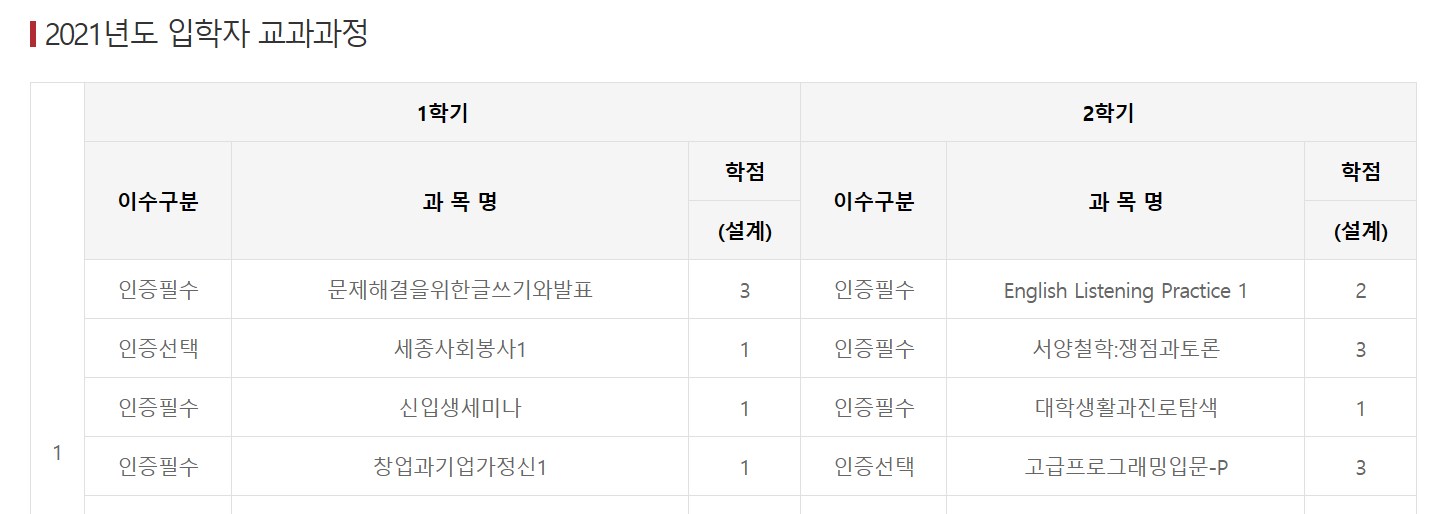

In [69]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
import json
import re

# 브라우저를 헤드리스 모드로 설정
options = Options()
options.headless = True

# WebDriver 설정
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=options)

# 웹페이지 접근
url = "https://abeek.sejong.ac.kr/abeek/program1602_5.html"
driver.get(url)

# 지정된 XPath에서 텍스트를 추출하여 년도 정보 추출
year_div = driver.find_element(By.XPATH, '//*[@id="contents"]/div[3]/div[1]')
year_text = year_div.text.strip()

# 뒤의 두 자리 숫자만 추출
last_two_digits = re.findall(r'\d{2}', year_text)
last_two_digits = last_two_digits[-1] if last_two_digits else ""

# "학과" 정보 추출
dept_link = driver.find_element(By.XPATH, '/html/body/div/div[3]/div/ul/li[3]/a/span')
department = (dept_link.text.strip() + '과') if dept_link else 'Unknown Department'

# 주어진 XPath를 사용하여 테이블 찾기
table = driver.find_element(By.XPATH, '//*[@id="contents"]/div[3]/div[2]/table')

# 테이블 데이터를 저장할 리스트 초기화
data = []
current_grade = ""  # 현재 학년을 저장할 변수

# 테이블의 행을 반복 처리
rows = table.find_elements(By.XPATH, './/tr')
for row in rows:
    # 헤더 또는 소계 행을 건너뜀
    if row.find_elements(By.XPATH, './/th') or "소계" in row.text:
        grade_cell = row.find_elements(By.XPATH, './/td[@class="cell_0" and @rowspan]')
        if grade_cell and int(grade_cell[0].get_attribute("rowspan")) >= 3:
            current_grade = grade_cell[0].find_element(By.XPATH, './/span').text.strip() if grade_cell[0].find_elements(By.XPATH, './/span') else "알 수 없음"
        continue

    grade_cell = row.find_elements(By.XPATH, './/td[@class="cell_0" and @rowspan]')
    if grade_cell and int(grade_cell[0].get_attribute("rowspan")) >= 3:
        current_grade = grade_cell[0].find_element(By.XPATH, './/span').text.strip() if grade_cell[0].find_elements(By.XPATH, './/span') else "알 수 없음"

    # 데이터 행을 처리
    cells = row.find_elements(By.XPATH, './/td')
    row_data = []
    for cell in cells:
        # 셀의 텍스트를 직접 가져오기
        text = cell.text.strip()
        cleaned_text = re.sub(' +', ' ', text)
        cleaned_text = re.sub('\n','', cleaned_text)
        row_data.append(cleaned_text)
    
    # 정확히 6개의 요소가 있는 행만 추가 (1학기/2학기 구조에 맞게)
    if len(row_data) == 6:
        semester_data = {
            "학년": current_grade,
            "1학기": {
                "이수구분": row_data[0],
                "과목명": row_data[1],
                "학점(설계)": row_data[2],
            },
            "2학기": {
                "이수구분": row_data[3],
                "과목명": row_data[4],
                "학점(설계)": row_data[5],
            }
        }
        data.append(semester_data)

# "년도"와 "학과" 정보를 포함하는 JSON 데이터 구조 생성
output_data = {
    "년도": last_two_digits,
    "학과": department,
    "데이터": data
}

# JSON 형식으로 변환하여 출력
json_output = json.dumps(output_data, ensure_ascii=False, indent=4)

# 선택적으로 JSON을 파일로 저장
with open('output_case2.json', 'w', encoding='utf-8') as json_file:
    json_file.write(json_output)

print("JSON 데이터가 생성되어 'output.json' 파일로 저장되었습니다.")

# 브라우저 종료
driver.quit()


JSON 데이터가 생성되어 'output.json' 파일로 저장되었습니다.


### 2.1 해당 형식의 테이블은 교과구분이 존재하지 않는다 그래서 이수체계도를 바탕으로 교과구분을 한다.

In [94]:
import csv

# 수정된 CSV 데이터
data = [
    {"분류": "전문교양", "강의명": "문제해결을위한글쓰기와발표"},
    {"분류": "전문교양", "강의명": "세종사회봉사1"},
    {"분류": "전문교양", "강의명": "대학생활과진로탐색"},
    {"분류": "전문교양", "강의명": "English Listening Practice 1"},
    {"분류": "전문교양", "강의명": "서양철학:쟁점과토론"},
    {"분류": "전문교양", "강의명": "English Reading Practice 1"},
    {"분류": "전문교양", "강의명": "Technical Writing 기초"},
    {"분류": "전문교양", "강의명": "신입생세미나"},
    {"분류": "전문교양", "강의명": "창업과기업가정신1"},
    {"분류": "BSM", "강의명": "일변수미적분학"},
    {"분류": "BSM", "강의명": "일반물리학및실험 1"},
    {"분류": "BSM", "강의명": "공업수학1"},
    {"분류": "BSM", "강의명": "통계학개론"},
    {"분류": "BSM", "강의명": "공학설계기초(산학프로젝트입문)"},
    {"분류": "BSM", "강의명": "고급프로그래밍입문-P"},
    {"분류": "BSM", "강의명": "선형대수및프로그래밍"},
    {"분류": "BSM", "강의명": "기초미적분학"},
    {"분류": "전공", "강의명": "C프로그래밍및실습"},
    {"분류": "전공", "강의명": "고급C프로그래밍및실습"},
    {"분류": "전공", "강의명": "창의SW융합논마드"},
    {"분류": "전공", "강의명": "자료구조 및 실습"},
    {"분류": "전공", "강의명": "데이터분석개론"},
    {"분류": "전공", "강의명": "확률통계및프로그래밍"},
    {"분류": "전공", "강의명": "웹프로그래밍"},
    {"분류": "전공", "강의명": "문제해결및실습:C++"},
    {"분류": "전공", "강의명": "문제해결및실습:JAVA"},
    {"분류": "전공", "강의명": "컴퓨터구조"},
    {"분류": "전공", "강의명": "알고리즘및실습"},
    {"분류": "전공", "강의명": "기계학습"},
    {"분류": "전공", "강의명": "데이터베이스"},
    {"분류": "전공", "강의명": "컴퓨터그래픽스"},
    {"분류": "전공", "강의명": "오픈소스SW개론"},
    {"분류": "전공", "강의명": "데이터사과학"},
    {"분류": "전공", "강의명": "데이터문제해결및실습1"},
    {"분류": "전공", "강의명": "텍스트마이닝"},
    {"분류": "전공", "강의명": "비즈니스인텔리전스"},
    {"분류": "전공", "강의명": "시계열분석및예측"},
    {"분류": "전공", "강의명": "대용량데이터처리"},
    {"분류": "전공", "강의명": "졸업연구 및 진로 1"},
    {"분류": "전공", "강의명": "졸업연구 및 진로2"},
    {"분류": "전공", "강의명": "고급기계학습"},
    {"분류": "전공", "강의명": "Capstone디자인 (산학융합프로젝트)"},
    {"분류": "전공", "강의명": "운영체제"},
    {"분류": "전공", "강의명": "의사결정분석"},
    {"분류": "전공", "강의명": "인공지능"},
    {"분류": "전공", "강의명": "데이터시각화"},
    {"분류": "전공", "강의명": "멀티미디어"},
    {"분류": "전공", "강의명": "수치해석"},
    {"분류": "전공", "강의명": "파이썬을 이용한 기계학습개론"},
    {"분류": "전공", "강의명": "데이터사이언스특론"},
    {"분류": "전공", "강의명": "고급데이터처리"},
    {"분류": "전공", "강의명": "특허와창업"},
    {"분류": "전공", "강의명": "데이터문제해결및실습2"},
]

# CSV 파일로 저장
with open('courses_case2.csv', 'w', encoding='utf-8-sig', newline='') as csvfile:
    fieldnames = ['분류', '강의명']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
    # 헤더 작성
    writer.writeheader()
    
    # 데이터 작성
    writer.writerows(data)

print("CSV 파일이 'courses_case2.csv'로 생성되었습니다.")


CSV 파일이 'courses_case2.csv'로 생성되었습니다.


### 2.2 위의 이수체계도 데이터를 바탕으로 json 데이터를 형식에 맞는 csv파일로 변환

In [95]:
import json
import csv
import re

def normalize_string(s):
    return re.sub(r'\s+', '', s)

# JSON 데이터를 읽어오기
with open('output_case2.json', 'r', encoding='utf-8') as json_file:
    json_data = json.load(json_file)

# 기존 CSV 파일 데이터 읽기
csv_file_path = 'courses_case2.csv'
course_data = []
with open(csv_file_path, 'r', encoding='utf-8-sig') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        course_data.append(row)

# 새로운 CSV 파일을 생성
output_file_path = 'course_requirements_normalized_case2.csv'
with open(output_file_path, 'w', encoding='utf-8-sig', newline='') as csvfile:
    fieldnames = ['년도', '학년', '학과', '학기', '교과구분', '인증구분', '교과목명', '학점(설계)', '설계']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
    # 헤더 작성
    writer.writeheader()

    # JSON 데이터에서 필요한 정보를 추출하여 작성
    for entry in json_data["데이터"]:
        for semester, details in entry.items():
            if semester in ['1학기', '2학기']:
                course_name = details["과목명"]
                
                # print(course_name)
                
                if course_name is "":
                    continue
                
                # 기존 CSV 파일에서 해당 과목의 교과구분을 찾기 (공백 제거하여 비교)
                matching_course = next(
                    (course for course in course_data if normalize_string(course['강의명']) == normalize_string(course_name)), 
                    None
                )
                if matching_course:
                    # 학점(설계) 처리
                    학점설계 = details["학점(설계)"]
                    if '(' in 학점설계 and ')' in 학점설계:  # 예: "3(1)"
                        학점, 설계 = 학점설계.split('(')
                        설계 = 설계.replace(')', '')
                    else:
                        학점 = 학점설계
                        설계 = '0'
                    
                    writer.writerow({
                        '년도': json_data['년도'],
                        '학년': entry['학년'],
                        '학과': json_data['학과'],
                        '학기': '1' if semester == '1학기' else '2',
                        '교과구분': matching_course['분류'],
                        '인증구분': details["이수구분"],
                        '교과목명': course_name,
                        '학점(설계)': 학점,
                        '설계': 설계
                    })
                else:
                    print(course_name)

print(f"CSV 파일이 '{output_file_path}'로 생성되었습니다.")


세계사:인간과문명
CSV 파일이 'course_requirements_normalized_case2.csv'로 생성되었습니다.


<>:37: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
<>:37: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
C:\Users\q5749\AppData\Local\Temp\ipykernel_18416\3338051246.py:37: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
  if course_name is "":
